In [8]:
import pymysql
import pandas as pd
from IPython.display import display, clear_output
from ipywidgets import Dropdown

connect = pymysql.connect(host='127.0.0.1', user='root', password='0000', db='practice', charset='utf8')
cur = connect.cursor()

test = "SELECT * FROM practice.m_area;"
test1 = "SELECT * FROM practice.m_store;"
query = "SELECT * FROM practice.tbl_order_202104;"
query1 = "SELECT * FROM practice.tbl_order_202105;"
query2 = "SELECT * FROM practice.tbl_order_202106;"

cur.execute(test)
test = pd.DataFrame(cur.fetchall())
test.columns = ['area_cd', 'wide_area', 'narrow_area']

cur.execute(test1)
test1 = pd.DataFrame(cur.fetchall())
test1.columns = ['store_id', 'store_name', 'area_cd']

cur.execute(query)
data = pd.DataFrame(cur.fetchall())
data.columns = ['order_id', 'store_id', 'customer_id', 'coupon_cd', 'sales_detail_id',
                'order_accept_date', 'delivered_date', 'takeout_flag', 'total_amount', 'status']

cur.execute(query1)
data1 = pd.DataFrame(cur.fetchall())
data1.columns = ['order_id', 'store_id', 'customer_id', 'coupon_cd', 'sales_detail_id',
                 'order_accept_date', 'delivered_date', 'takeout_flag', 'total_amount', 'status']

cur.execute(query2)
data2 = pd.DataFrame(cur.fetchall())
data2.columns = ['order_id', 'store_id', 'customer_id', 'coupon_cd', 'sales_detail_id',
                 'order_accept_date', 'delivered_date', 'takeout_flag', 'total_amount', 'status']

order_data = pd.merge(test, test1, on='area_cd', how='left')
all = pd.concat([data,data1,data2],ignore_index=True)
all = pd.merge(all,order_data,on='store_id',how='left')
all

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,area_cd,wide_area,narrow_area,store_name
0,34104383,11,C65806632,57,61573513,2021-04-01 11:00,2021-04-01 11:39,1,28270,1,SL,서울,서울,자양로점
1,70652318,59,C09760173,37,54068709,2021-04-01 11:00,2021-04-01 11:34,0,28270,2,SL,서울,서울,가마산로2점
2,71640388,195,C61227084,17,93678366,2021-04-01 11:00,2021-04-01 11:54,0,26470,9,GB,경기,경기북부,화중로점
3,75673365,127,C64119972,17,5287952,2021-04-01 11:00,2021-04-01 11:17,0,23080,2,BS,부산,부산,분포로점
4,9077529,174,C10231192,18,18248867,2021-04-01 11:00,2021-04-01 11:35,0,46920,2,GJ,광주,광주,하남산단점
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506491,98816121,185,C40062806,93,85969769,2021-06-23 18:15,2021-06-23 19:04,1,23120,9,SJ,세종,세종,조치원점
506492,3742971,122,C50603754,13,17470547,2021-06-23 18:15,2021-06-23 18:24,1,46240,1,BS,부산,부산,해운대해변로점
506493,40959820,119,C97547347,74,93884882,2021-06-23 18:15,2021-06-23 18:57,0,38650,2,BS,부산,부산,남동남로점
506494,52250483,191,C45463200,76,32019267,2021-06-23 18:15,2021-06-23 18:25,0,39010,2,GB,경기,경기북부,사우중로점


In [9]:

def order_by_store(val):
    clear_output()
    display(dropdown)
    pick_data = all.loc[(all['store_name']==val['new'])&
                               (all['status'].isin([1,2]))]
    display(pick_data.head())

store_list = test1['store_name'].tolist()

dropdown = Dropdown(options=store_list,description='지역 선택:')
dropdown.observe(order_by_store, names='value')
display(dropdown)

Dropdown(description='지역 선택:', options=('삼일대로점', '세종대로점', '무교로점', '덕수궁길점', '서소문로점', '청계청로점', '노해로점', '당산로점', '…

In [11]:
from ipywidgets import IntSlider
def store_lower(val):
    clear_output()
    display(slider)
    temp = all.groupby('store_name')
    print(temp.size()[temp.size()<val['new']])

slider = IntSlider(value=1100,min=1000,max=2000,step=100,description='건수:',)
slider.observe(store_lower,names='value')
display(slider)


IntSlider(value=1100, description='건수:', max=2000, min=1000, step=100)

In [18]:
from ipywidgets import ToggleButtons

area_list = test['wide_area'].unique()

def order_by_area(val):
    clear_output()
    display(toggle)
    pick_data = all.loc[
        (all['wide_area']==val['new'])&
        (all['status'].isin([1,2]))]
    display(pick_data.head())

toggle = ToggleButtons(options=area_list)
toggle.observe(order_by_area,names='value')
display(toggle)

ToggleButtons(index=1, options=('서울', '부산', '대전', '광주', '세종', '경기'), value='부산')

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,area_cd,wide_area,narrow_area,store_name
3,75673365,127,C64119972,17,5287952,2021-04-01 11:00,2021-04-01 11:17,0,23080,2,BS,부산,부산,분포로점
14,33095269,113,C14475051,67,34036936,2021-04-01 11:01,2021-04-01 11:52,0,23160,2,BS,부산,부산,달맞이길점
35,59476456,96,C54836002,66,90620694,2021-04-01 11:02,2021-04-01 11:34,0,22520,2,BS,부산,부산,구덕로점
37,71121881,120,C75817216,45,7610409,2021-04-01 11:02,2021-04-01 11:15,1,41330,1,BS,부산,부산,청사포로점
38,80022601,109,C78128748,92,780491,2021-04-01 11:02,2021-04-01 11:15,1,35300,1,BS,부산,부산,명지국제7로점


ToggleButtons(options=('서울', '부산', '대전', '광주', '세종', '경기'), value='서울')

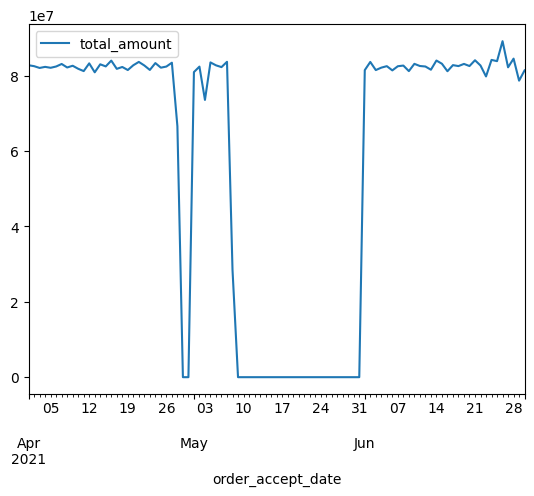

In [27]:
from ipywidgets import ToggleButtons

area_list = test['wide_area'].unique()

def graph_by_area(val):
    clear_output()
    display(toggle2)
    pick_data = all.loc[
        (all['wide_area']==val['new'])&
        (all['status'].isin([1,2]))]
    temp = pick_data[['order_accept_date','total_amount']].copy()
    temp.loc[:,'order_accept_date'] = \
        pd.to_datetime(temp['order_accept_date'])
    temp.set_index('order_accept_date',inplace=True)
    temp.resample('D').sum().plot()
 
toggle2 = ToggleButtons(options=area_list)
toggle2.observe(graph_by_area,names='value')
display(toggle2)